In [1]:
import pandas as pd
from pycaret.classification import *

In [3]:
df = pd.read_csv('../data/creditcard.csv')
unseen = df.sample(frac = 0.1, random_state = 42)
df = df.drop(unseen.index)

In [6]:
unseen.to_csv('../data/test.csv')

In [7]:
import mlflow
setup(data = df, target = 'Class', session_id = 42, ignore_features = ['Time'], train_size = 0.8, normalize = True, fix_imbalance = True, polynomial_features = True, log_experiment = True, experiment_name = "Credit Card Fraud - Expt 2", log_plots = True)

,Description,Value
0,session_id,42
1,Target,Class
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(256326, 31)"
5,Missing Values,False
6,Numeric Features,29
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


({'acc': <pycaret.containers.metrics.classification.AccuracyMetricContainer at 0x7f91a7851c70>,
  'auc': <pycaret.containers.metrics.classification.ROCAUCMetricContainer at 0x7f91a7851ca0>,
  'recall': <pycaret.containers.metrics.classification.RecallMetricContainer at 0x7f91a7851d30>,
  'precision': <pycaret.containers.metrics.classification.PrecisionMetricContainer at 0x7f91a7851e80>,
  'f1': <pycaret.containers.metrics.classification.F1MetricContainer at 0x7f91a7851fd0>,
  'kappa': <pycaret.containers.metrics.classification.KappaMetricContainer at 0x7f91a78ba160>,
  'mcc': <pycaret.containers.metrics.classification.MCCMetricContainer at 0x7f91a78b23a0>},
 True,
               V1        V2        V3        V4        V5        V6        V7  \
 111909  0.538860 -0.264890  0.581722  0.433980 -0.762300 -0.052061 -0.607471   
 118954  0.520079 -0.074854  0.512299  0.841550 -0.471953 -0.025205 -0.310032   
 229187  0.291984  0.552464 -0.857232 -0.368633  0.688975  0.341489 -0.518032   
 77

In [9]:
top_2 = compare_models(sort = "F1", n_select = 2, fold = 5, exclude = ["ada", "gbc", "knn"])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9995,0.9640,0.8043,0.8786,0.8397,0.8395,0.8403,12.0760
rf,Random Forest Classifier,0.9994,0.9679,0.7817,0.8415,0.8104,0.8101,0.8107,32.4440
lightgbm,Light Gradient Boosting Machine,0.9987,0.9350,0.7930,0.5865,0.6718,0.6711,0.6801,2.3340
dt,Decision Tree Classifier,0.9978,0.8773,0.7563,0.4205,0.5393,0.5383,0.5623,6.5740
qda,Quadratic Discriminant Analysis,0.9890,0.9576,0.8554,0.1208,0.2116,0.2092,0.3188,0.8740
ridge,Ridge Classifier,0.9865,0.0000,0.8640,0.1018,0.1820,0.1794,0.2936,0.2640
lda,Linear Discriminant Analysis,0.9865,0.9761,0.8640,0.1018,0.1820,0.1794,0.2936,0.8840
nb,Naive Bayes,0.9811,0.9552,0.8497,0.0727,0.1339,0.1311,0.2453,0.4320
lr,Logistic Regression,0.9682,0.9689,0.9009,0.0468,0.0889,0.0859,0.2012,1.8320
svm,SVM - Linear Kernel,0.9654,0.0000,0.9122,0.0437,0.0834,0.0804,0.1954,0.5400


In [10]:
for model in top_2:
    print(model)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=42, verbose=0,
                     warm_start=False)
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False

In [14]:
import numpy as np
et = top_2[0]
et_params = {'min_samples_leaf' : np.arange(1,3), 'n_estimators' : np.arange(50, 200, 10), 'min_samples_split' : np.arange(1, 5)}
et_tuned = tune_model(et, custom_grid = et_params, fold = 5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9993,0.9649,0.7429,0.8254,0.7820,0.7816,0.7827
1,0.9995,0.9660,0.8286,0.8657,0.8467,0.8465,0.8467
2,0.9995,0.9295,0.8028,0.8769,0.8382,0.8380,0.8388
3,0.9996,0.9894,0.8592,0.9104,0.8841,0.8839,0.8842
4,0.9995,0.9674,0.8169,0.9062,0.8593,0.8590,0.8602
Mean,0.9995,0.9635,0.8101,0.8769,0.8420,0.8418,0.8425
SD,0.0001,0.0193,0.0384,0.0309,0.0338,0.0338,0.0337


In [15]:
rf = top_2[1]
rf_parameters = {'n_estimators': np.arange(10, 200, 10), 'min_samples_leaf': [1, 2], 'min_samples_split': np.arange(2, 6)}
tuned_rf = tune_model(rf, custom_grid = rf_parameters, fold = 5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9992,0.9673,0.7286,0.7846,0.7556,0.7552,0.7557
1,0.9994,0.9613,0.7714,0.8438,0.8060,0.8057,0.8065
2,0.9993,0.9413,0.7887,0.8235,0.8058,0.8054,0.8056
3,0.9997,0.9888,0.8732,0.9254,0.8986,0.8984,0.8988
4,0.9994,0.9835,0.7746,0.8730,0.8209,0.8206,0.8221
Mean,0.9994,0.9684,0.7873,0.8501,0.8173,0.8170,0.8177
SD,0.0002,0.0169,0.0474,0.0474,0.0462,0.0463,0.0463


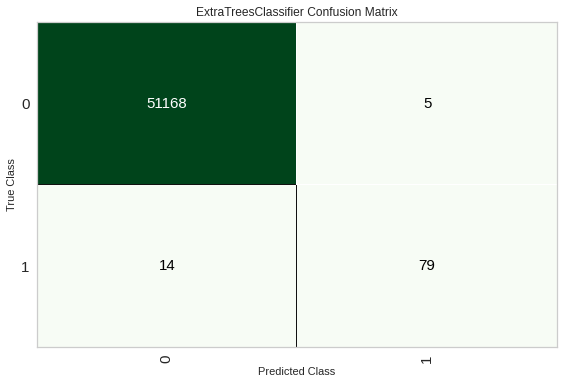

In [16]:
plot_model(et_tuned, plot = "confusion_matrix")

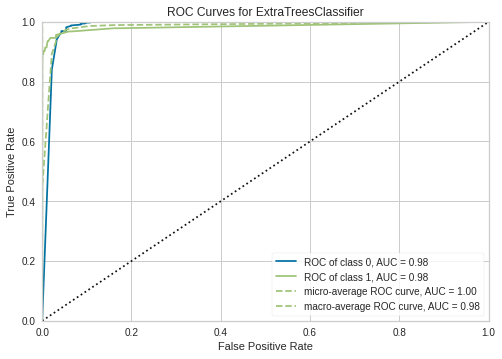

In [18]:
plot_model(et_tuned, plot = "auc")

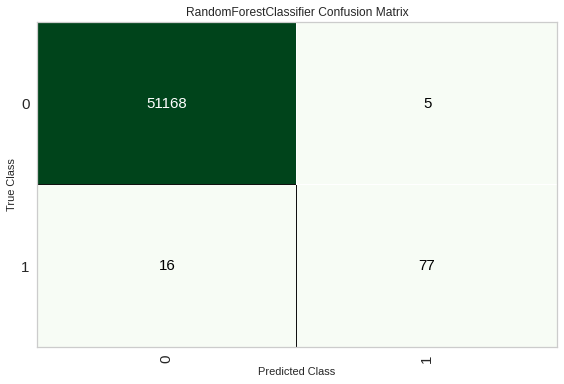

In [19]:
plot_model(tuned_rf, plot = "confusion_matrix")

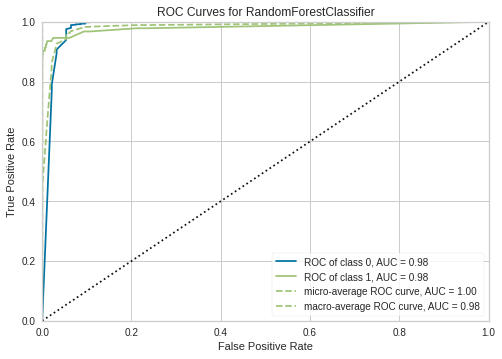

In [20]:
plot_model(tuned_rf, plot = "auc")

In [21]:
predict_model(et_tuned)
predict_model(tuned_rf)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.9996,0.9848,0.8495,0.9405,0.8927,0.8925,0.8936


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.9996,0.9828,0.8280,0.9390,0.8800,0.8798,0.8815


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V4_Power2,V17_Power2,V14_Power2,V16_Power2,V10_Power2,V12_Power2,V19_Power2,Class,Label,Score
0,0.538860,-0.264890,0.581722,0.433980,-0.762300,-0.052061,-0.607471,0.319208,0.607767,0.125471,...,-0.373280,-0.091189,-0.033252,-0.179909,-0.166162,-0.104374,-0.235287,0,0,1.0000
1,0.520079,-0.074854,0.512299,0.841550,-0.471953,-0.025205,-0.310032,0.224924,0.180408,0.174273,...,-0.133961,-0.082845,-0.068795,-0.241451,-0.163729,-0.208248,-0.149309,0,0,1.0000
2,0.291984,0.552464,-0.857232,-0.368633,0.688975,0.341489,-0.518032,-2.225461,-0.455774,-1.163601,...,-0.397685,-0.098393,-0.155473,0.093937,0.060579,0.054452,-0.515681,0,0,1.0000
3,-0.387849,0.320123,0.994165,-0.747898,0.124010,0.709494,0.305602,0.294808,-0.245327,-0.458469,...,-0.202989,-0.023193,-0.164686,-0.056760,-0.132923,-0.120636,-0.173642,0,0,1.0000
4,-0.274353,0.281240,1.088880,0.226552,-0.947547,0.412891,0.731122,0.008724,-0.073483,-0.387724,...,-0.436388,-0.099279,-0.197652,-0.272799,-0.143076,-0.182849,-0.513888,0,0,0.9889
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51261,-0.507999,1.747756,-1.909770,0.984071,0.177885,-1.032910,0.025103,0.752847,-0.024872,-0.060296,...,-0.014204,1.312948,1.696971,-0.041169,-0.168068,-0.182964,-0.152266,0,0,0.9981
51262,-0.977367,-0.600678,0.033809,-0.292629,-3.041962,2.277253,2.696853,0.276765,0.204897,-1.528903,...,-0.420782,-0.094049,-0.197347,-0.260147,0.226802,-0.147958,-0.169689,0,0,1.0000
51263,0.234095,-0.891354,0.119515,0.376856,-0.352427,0.983732,-0.209680,0.214497,0.435524,-0.246653,...,-0.394610,-0.006353,-0.183033,-0.128058,-0.158279,0.058503,-0.510415,0,0,1.0000
51264,0.924674,-0.425163,-0.929382,-0.071914,0.346293,0.784553,-0.262361,0.321758,0.950451,-0.146921,...,-0.457725,-0.086168,-0.122655,0.041173,-0.164975,-0.117516,-0.486452,0,0,1.0000


In [22]:
finalize_model(et_tuned)
finalize_model(tuned_rf)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=180,
                       n_jobs=-1, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [23]:
deploy_model(model = et_tuned, model_name = 'et_deployed', platform = 'aws', authentication = {'bucket' : 'mlopsassignment'})

Model Successfully Deployed on AWS S3


In [25]:
deploy_model(model = tuned_rf, model_name = 'rf_deployed', platform = 'aws', authentication = {'bucket' : 'mlopsassignment'})

Model Successfully Deployed on AWS S3
